# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set unit

unit = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={unit}&q="
#empty list
temperature =[]
humidity = []
cloudiness = []
windspeed = []
lat = []
lon = []
foundcities = []
country =[]
date = []

#search loop for cities list

for city in cities:
    weathercheck = requests.get(url+city).json()
#append to lists
    try:
        foundcities.append(weathercheck["name"])
        temperature.append(weathercheck["main"]["temp_max"])
        humidity.append(weathercheck["main"]["humidity"])
        cloudiness.append(weathercheck["clouds"]["all"])
        windspeed.append(weathercheck["wind"]["speed"])
        lat.append(weathercheck["coord"]["lat"])
        lon.append(weathercheck["coord"]["lon"])
        country.append(weathercheck["sys"]["country"])
        date.append(weathercheck["dt"])
        print(f'{city} found and info added')
    except:
        print(f'{city}: was not found, skipping....')
        pass
    

    

jamestown found and info added
mineiros found and info added
constantine found and info added
busselton found and info added
sooke found and info added
vaini found and info added
cape town found and info added
hermanus found and info added
kodiak found and info added
mys shmidta: was not found, skipping....
uyemskiy found and info added
cabo san lucas found and info added
bethel found and info added
ushuaia found and info added
hamilton found and info added
mashhad found and info added
ribeira grande found and info added
bredasdorp found and info added
nizhniy kuranakh found and info added
illoqqortoormiut: was not found, skipping....
saint-philippe found and info added
san patricio found and info added
san vicente found and info added
chokurdakh found and info added
lebu found and info added
hobart found and info added
kapaa found and info added
pa sang found and info added
mar del plata found and info added
nemuro found and info added
tagusao found and info added
klaksvik found and i

yetkul found and info added
aginskoye found and info added
tucumcari found and info added
nyurba found and info added
ust-kamchatsk: was not found, skipping....
damietta found and info added
chenghai found and info added
solnechnyy found and info added
saskylakh found and info added
moose factory found and info added
ondorhaan: was not found, skipping....
guasca found and info added
whitefish found and info added
airai found and info added
bambous virieux found and info added
leshukonskoye found and info added
yangjiang found and info added
buala found and info added
san bartolome de tirajana found and info added
aripuana found and info added
panacan found and info added
bafq found and info added
ketchikan found and info added
paamiut found and info added
mentok: was not found, skipping....
ambunti found and info added
cazaje: was not found, skipping....
tilichiki found and info added
baykit found and info added
isoka found and info added
general roca found and info added
la cruz found

bathsheba found and info added
bang phae found and info added
tual found and info added
millville found and info added
yarmouth found and info added
port augusta found and info added
yicheng found and info added
luwingu found and info added
xichang found and info added
rock sound found and info added
olinda found and info added
bloomington found and info added
chicama found and info added
yakeshi found and info added
kirkwall found and info added
grindavik found and info added
bubaque found and info added
bay roberts found and info added
moerai found and info added
rawson found and info added
saleaula: was not found, skipping....
surt found and info added
geraldton found and info added
verkhoyansk found and info added
bagotville found and info added
mastic beach found and info added
preobrazheniye found and info added
dunedin found and info added
shimoda found and info added
vinh found and info added
vulturu found and info added
nurlat found and info added
letpadan found and info added

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dataframe from list
weather_df = pd.DataFrame({"City": foundcities,
                               "Country": country,
                                "Temperature": temperature,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Windspeed":windspeed,
                                "Date": date,
                                "Longitude": lon,
                                "Latitude": lat})
weather_df


,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Date,Longitude,Latitude
0,Jamestown,US,69.80,56,1,11.41,1593101995,-79.24,42.10
1,Mineiros,BR,79.84,50,28,12.06,1593101995,-52.55,-17.57
2,Constantine,DZ,91.40,27,40,12.75,1593101995,6.61,36.37
3,Busselton,AU,54.00,66,16,10.00,1593101995,115.33,-33.65
4,Sooke,CA,62.01,87,20,2.15,1593101995,-123.73,48.37
...,...,...,...,...,...,...,...,...,...
572,Makakilo City,US,75.20,88,40,6.93,1593102030,-158.09,21.35
573,Sungai Raya,ID,77.27,84,80,0.83,1593102030,108.90,0.70
574,Sarāhan,IN,63.01,69,30,1.32,1593102030,77.80,31.52
575,Punta Alta,AR,48.54,52,0,11.68,1593102030,-62.07,-38.88


In [5]:
weather_df.to_csv(r'/Users/applewang/Desktop/github/api_challenge/cityweather.csv' , index=False)



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
toohumid = weather_df.loc[weather_df["Humidity"]>100]


In [7]:
#  Get the indices of cities that have humidity over 100%.
print(len(toohumid))

0


In [8]:
# Extract relevant fields from the data frame
plotdata = weather_df[["City","Latitude","Temperature","Humidity","Cloudiness","Windspeed"]]

# Export the City_Data into a csv
plotdata.to_csv(r'/Users/applewang/Desktop/github/api_challenge/plotdata.csv' , index=False)

plotdata.head()


,City,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,Jamestown,42.10,69.80,56,1,11.41
1,Mineiros,-17.57,79.84,50,28,12.06
2,Constantine,36.37,91.40,27,40,12.75
3,Busselton,-33.65,54.00,66,16,10.00
4,Sooke,48.37,62.01,87,20,2.15


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

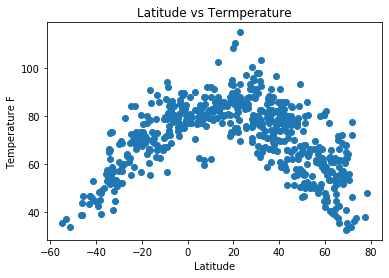

In [14]:
x_latitude = plotdata["Latitude"]
y_termperature = plotdata["Temperature"]
plt.scatter(x_latitude,y_termperature)

plt.xlabel("Latitude")
plt.ylabel("Temperature F")
plt.title('Latitude vs Termperature')

plt.savefig("/Users/applewang/Desktop/github/api_challenge/latitude_vs_temperature.png")


## Latitude vs. Humidity Plot

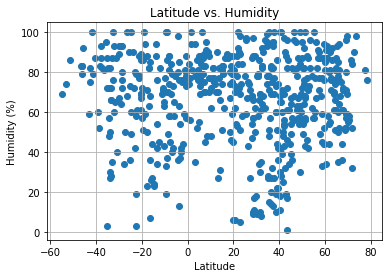

In [11]:
y_humidity = plotdata["Humidity"]
plt.scatter(x_latitude,y_humidity)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid()

plt.savefig("/Users/applewang/Desktop/github/api_challenge/latitude_vs_humidity.png")


## Latitude vs. Cloudiness Plot

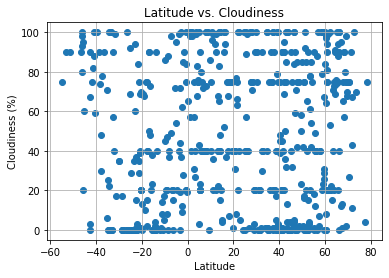

In [38]:
y_cloudiness = plotdata["Cloudiness"]
plt.scatter(x_latitude,y_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid()

plt.savefig("/Users/applewang/Desktop/github/api_challenge/latitude_vs_cloudiness.png")



## Latitude vs. Wind Speed Plot

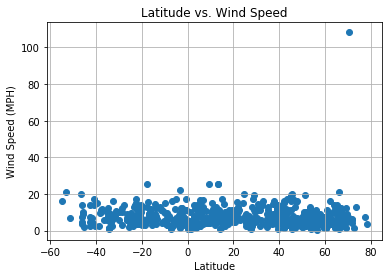

In [41]:
y_windspeed = plotdata["Windspeed"]
plt.scatter(x_latitude,y_windspeed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Latitude vs. Wind Speed')
plt.grid()

plt.savefig("/Users/applewang/Desktop/github/api_challenge/latitude_vs_windspeed.png")



## Linear Regression

In [7]:
# OPTIONAL: Create a function to create Linear Regression plots

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern = plotdata[plotdata["Latitude"]>= 0]
southern = plotdata[plotdata["Latitude"]<0]

northern
                    

,City,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,Jamestown,42.10,69.80,56,1,11.41
2,Constantine,36.37,91.40,27,40,12.75
4,Sooke,48.37,62.01,87,20,2.15
8,Saint Paul Harbor,57.79,50.00,87,90,16.11
9,Uyemskiy,64.47,62.60,51,20,11.18
...,...,...,...,...,...,...
571,Aloleng,16.13,80.24,87,100,9.28
572,Makakilo City,21.35,75.20,88,40,6.93
573,Sungai Raya,0.70,77.27,84,80,0.83
574,Sarāhan,31.52,63.01,69,30,1.32


In [17]:
southern

,City,Latitude,Temperature,Humidity,Cloudiness,Windspeed
1,Mineiros,-17.57,79.84,50,28,12.06
3,Busselton,-33.65,54.00,66,16,10.00
5,Vaini,-21.20,71.60,88,40,4.70
6,Cape Town,-33.93,62.01,82,90,17.22
7,Hermanus,-34.42,64.99,57,0,1.99
...,...,...,...,...,...,...
561,Port-Gentil,-0.72,77.00,78,90,11.41
565,Daru,-9.08,78.85,86,84,15.82
568,São Sepé,-30.16,60.80,93,75,10.29
570,Tautira,-17.73,77.00,88,20,17.22


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

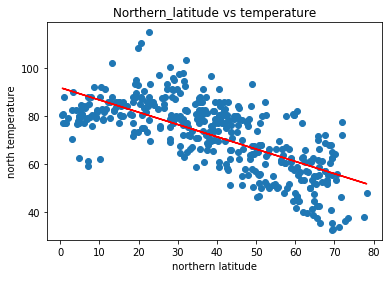

<Figure size 432x288 with 0 Axes>

In [18]:
x_north = northern["Latitude"]
y_north_temp = northern["Temperature"]

plt.scatter(x_north,y_north_temp)

plt.title('Northern_latitude vs temperature')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_temp)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('northern latitude')
plt.ylabel('north temperature')
plt.show()
plt.savefig("/Users/applewang/Desktop/github/api_challenge/Northernlatitude_vs_temperature.png")

In [19]:
#this regression shows that the closer to the equator, the hotter it gets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

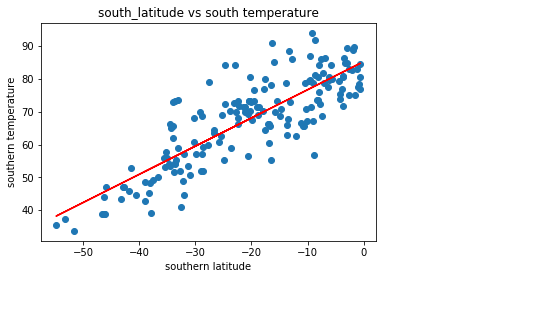

<Figure size 432x288 with 0 Axes>

In [20]:
x_south = southern["Latitude"]
y_south_temp = southern["Temperature"]

plt.scatter(x_south,y_south_temp)

plt.title('south_latitude vs south temperature')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_temp)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('southern latitude')
plt.ylabel('southern temperature')
plt.show()
plt.savefig("/Users/applewang/Desktop/github/api_challenge/Southernlatitude_vs_temperature.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

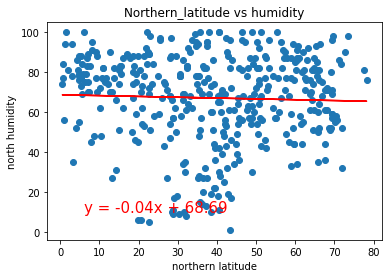

<Figure size 432x288 with 0 Axes>

In [21]:
x_north = northern["Latitude"]
y_north_hum = northern["Humidity"]

plt.scatter(x_north,y_north_hum)

plt.title('Northern_latitude vs humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_hum)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('northern latitude')
plt.ylabel('north humidity')
plt.show()
plt.savefig("/Users/applewang/Desktop/github/api_challenge/Northernlatitude_vs_humidity.png")

In [ ]:
#this regression shows that there seems to not have correlation between humidity and latitude in this dataset. 
#the humidity has to be related to other factorsoutside this dataset

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

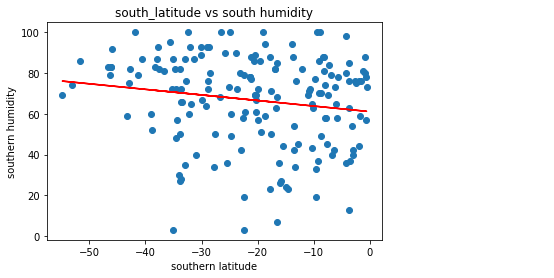

<Figure size 432x288 with 0 Axes>

In [22]:
x_south = southern["Latitude"]
y_south_hum = southern["Humidity"]

plt.scatter(x_south,y_south_hum)

plt.title('south_latitude vs south humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_hum)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('southern latitude')
plt.ylabel('southern humidity')
plt.show()
plt.savefig("/Users/applewang/Desktop/github/api_challenge/Southernlatitude_vs_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

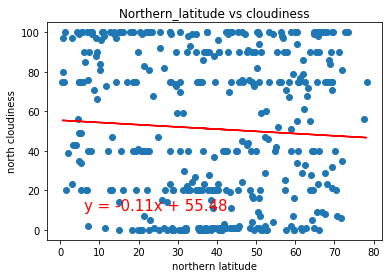

<Figure size 432x288 with 0 Axes>

In [23]:
x_north = northern["Latitude"]
y_north_cloud = northern["Cloudiness"]

plt.scatter(x_north,y_north_cloud)

plt.title('Northern_latitude vs cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_cloud)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('northern latitude')
plt.ylabel('north cloudiness')
plt.show()
plt.savefig("/Users/applewang/Desktop/github/api_challenge/Northernlatitude_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

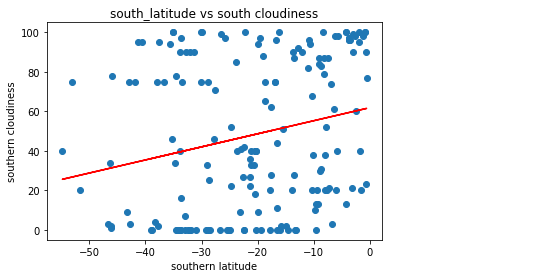

<Figure size 432x288 with 0 Axes>

In [24]:
x_south = southern["Latitude"]
y_south_cloud = southern["Cloudiness"]

plt.scatter(x_south,y_south_cloud)

plt.title('south_latitude vs south cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_cloud)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('southern latitude')
plt.ylabel('southern cloudiness')
plt.show()
plt.savefig("/Users/applewang/Desktop/github/api_challenge/Southernlatitude_vs_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

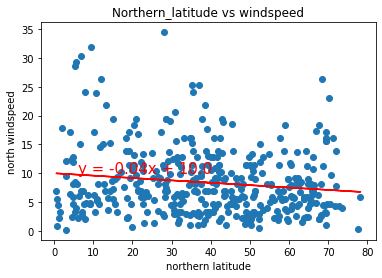

<Figure size 432x288 with 0 Axes>

In [25]:
x_north = northern["Latitude"]
y_north_wind = northern["Windspeed"]

plt.scatter(x_north,y_north_wind)

plt.title('Northern_latitude vs windspeed')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_wind)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('northern latitude')
plt.ylabel('north windspeed')
plt.show()
plt.savefig("/Users/applewang/Desktop/github/api_challenge/Northernlatitude_vs_windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

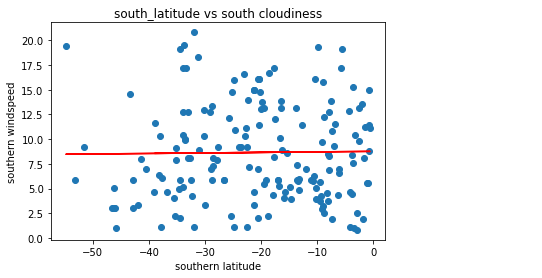

<Figure size 432x288 with 0 Axes>

In [26]:
x_south = southern["Latitude"]
y_south_wind = southern["Windspeed"]

plt.scatter(x_south,y_south_wind)

plt.title('south_latitude vs south cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_wind)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('southern latitude')
plt.ylabel('southern windspeed')
plt.show()
plt.savefig("/Users/applewang/Desktop/github/api_challenge/Southernlatitude_vs_cloudiness.png")
